The challenge provided a dataset consisting of Facebook page metadata, post metadata, and some basic text features of the link previews.

In [1]:
!pip install networkx
!pip install torch
!pip install scipy>=1.8
#!pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import networkx as nx
import matplotlib.pyplot as plt #needed to visualize loss curves
import numpy as np 
import pandas as pd
import csv
from tqdm import tqdm

In [4]:
# load nodes details
with open("fb-pages-food.nodes") as f:
    fb_nodes = f.read().splitlines() 

# load edges (or links)
with open("fb-pages-food.edges") as f:
    fb_links = f.read().splitlines() 

len(fb_nodes), len(fb_links)

(621, 2102)

In [6]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910476 sha256=a16b4634f4684d30e5ed5306cfa3dbc9a7506956a192f89f8eca87c7237fdba1
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [7]:
import pandas as pd
import networkx as nx
import torch
from torch_geometric.utils import from_networkx

# load nodes details
with open("fb-pages-food.nodes") as f:
    fb_nodes = f.read().splitlines() 

# load edges (or links)
with open("fb-pages-food.edges") as f:
    fb_links = f.read().splitlines() 

# create pandas dataframe from edges data
fb_df = pd.DataFrame([i.split(',') for i in fb_links], columns=['source', 'target'])

# create networkx graph from pandas dataframe
G = nx.from_pandas_edgelist(fb_df, 'source', 'target', create_using=nx.Graph())

# convert networkx graph to PyTorch Geometric data object
dataset = from_networkx(G)


In [8]:
# captture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in tqdm(fb_links):
  node_list_1.append(i.split(',')[0])
  node_list_2.append(i.split(',')[1])

fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

100%|██████████| 2102/2102 [00:00<00:00, 342944.88it/s]


In [9]:
print(node_list_1)

['0', '0', '0', '0', '0', '0', '1', '1', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '557', '557', '557', '557', '557', '4', '4', '4', '4', '5', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '10', '10', '11', '11', '11', '11', '11', '11', '12', '12', '12', '13', '14', '14', '15', '15', '15', '15', '15', '15', '15', '15', '15', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '17', '17', '17', '17', '17', '18', '408', '408', '408', '408', '408', '20', '20', '20', '20', '20', '20', '21', '21', '21', '21', '22', '22', '22', '22', '22', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '24', '24', '24', '24', '24', '24', '25', '26', '27', '28', '28', '28', '29', '30', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31'

In [10]:
print(node_list_2)

['276', '58', '132', '603', '398', '555', '265', '611', '265', '182', '345', '608', '377', '40', '352', '450', '484', '299', '65', '185', '228', '227', '182', '90', '151', '394', '265', '287', '254', '336', '503', '429', '163', '486', '478', '518', '293', '265', '305', '339', '35', '444', '583', '278', '434', '73', '98', '369', '317', '288', '206', '289', '249', '593', '434', '254', '550', '131', '446', '89', '90', '265', '15', '340', '248', '229', '56', '570', '189', '611', '107', '23', '465', '67', '351', '498', '393', '258', '212', '485', '264', '380', '174', '259', '548', '618', '310', '352', '264', '326', '265', '70', '340', '67', '454', '505', '43', '432', '56', '516', '119', '400', '545', '334', '237', '374', '117', '274', '613', '466', '75', '185', '608', '450', '299', '65', '265', '265', '418', '581', '143', '599', '324', '355', '481', '238', '242', '160', '516', '441', '329', '334', '270', '187', '104', '22', '420', '434', '58', '128', '257', '288', '277', '182', '340', '157'

In [11]:
print(fb_df)

     node_1 node_2
0         0    276
1         0     58
2         0    132
3         0    603
4         0    398
...     ...    ...
2097    597    611
2098    601    603
2099    601    616
2100    603    616
2101    311    613

[2102 rows x 2 columns]


In [12]:
print(fb_links)

['0,276', '0,58', '0,132', '0,603', '0,398', '0,555', '1,265', '1,611', '2,265', '2,182', '2,345', '3,608', '3,377', '3,40', '3,352', '3,450', '3,484', '3,299', '3,65', '3,185', '3,228', '557,227', '557,182', '557,90', '557,151', '557,394', '4,265', '4,287', '4,254', '4,336', '5,503', '6,429', '6,163', '6,486', '6,478', '6,518', '7,293', '7,265', '7,305', '7,339', '7,35', '7,444', '7,583', '8,278', '8,434', '8,73', '8,98', '8,369', '9,317', '9,288', '9,206', '9,289', '9,249', '9,593', '9,434', '9,254', '9,550', '9,131', '9,446', '9,89', '9,90', '9,265', '9,15', '9,340', '9,248', '9,229', '9,56', '9,570', '9,189', '9,611', '9,107', '9,23', '9,465', '9,67', '9,351', '9,498', '10,393', '10,258', '11,212', '11,485', '11,264', '11,380', '11,174', '11,259', '12,548', '12,618', '12,310', '13,352', '14,264', '14,326', '15,265', '15,70', '15,340', '15,67', '15,454', '15,505', '15,43', '15,432', '15,56', '16,516', '16,119', '16,400', '16,545', '16,334', '16,237', '16,374', '16,117', '16,274', '1

In [13]:
from sklearn.model_selection import train_test_split
# create graph
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())


# Split the edges into training and test sets, with 20% of edges used for testing
edges_train, edges_test = train_test_split(list(G.edges()), test_size=0.2, random_state=42)

# Create separate subgraphs for training and testing, using only the edges in the corresponding set
G_train = G.edge_subgraph(edges_train)
G_test = G.edge_subgraph(edges_test)

In [14]:
from sklearn.model_selection import train_test_split
# create graph
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())


# Split the edges into training and test sets, with 20% of edges used for testing
edges_train, edges_test = train_test_split(list(G.edges()), test_size=0.2, random_state=42)

# Create separate subgraphs for training and testing, using only the edges in the corresponding set
G_train = G.edge_subgraph(edges_train)
G_test = G.edge_subgraph(edges_test)

In [15]:
print(edges_train)

[('603', '355'), ('244', '368'), ('160', '383'), ('3', '450'), ('340', '355'), ('1', '265'), ('265', '464'), ('88', '474'), ('254', '155'), ('89', '155'), ('90', '373'), ('164', '337'), ('340', '107'), ('49', '196'), ('494', '332'), ('90', '389'), ('274', '613'), ('67', '578'), ('603', '56'), ('237', '117'), ('195', '217'), ('67', '531'), ('131', '122'), ('225', '493'), ('89', '221'), ('449', '62'), ('264', '318'), ('113', '494'), ('253', '232'), ('41', '594'), ('70', '526'), ('439', '60'), ('299', '168'), ('603', '350'), ('144', '150'), ('517', '224'), ('265', '531'), ('608', '377'), ('558', '616'), ('446', '116'), ('65', '17'), ('265', '54'), ('237', '274'), ('524', '579'), ('89', '300'), ('317', '350'), ('182', '90'), ('357', '430'), ('131', '217'), ('518', '63'), ('56', '235'), ('43', '253'), ('65', '333'), ('518', '357'), ('47', '500'), ('41', '397'), ('265', '584'), ('31', '142'), ('581', '140'), ('249', '67'), ('257', '157'), ('608', '17'), ('86', '578'), ('67', '498'), ('317', 

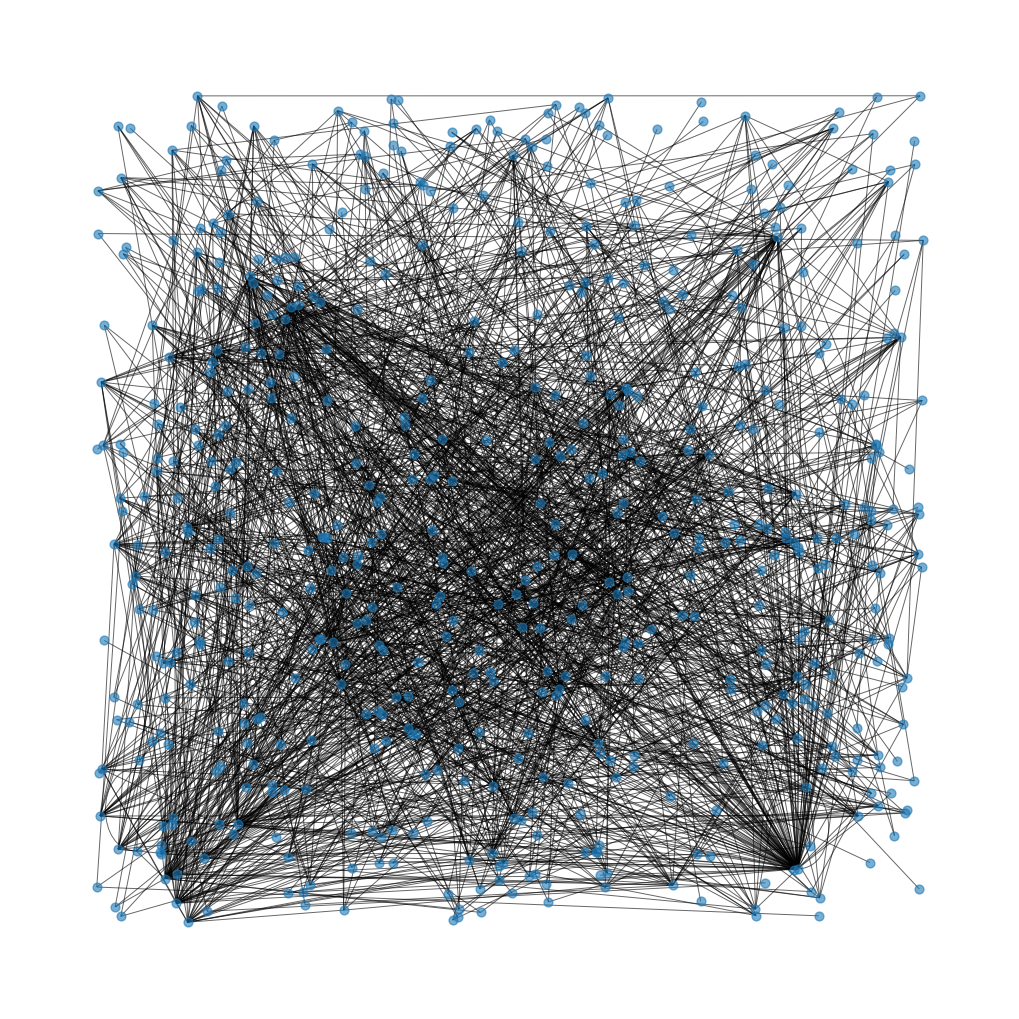

In [16]:
# create graph
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())

# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G_train, seed=23)
nx.draw(G_train, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

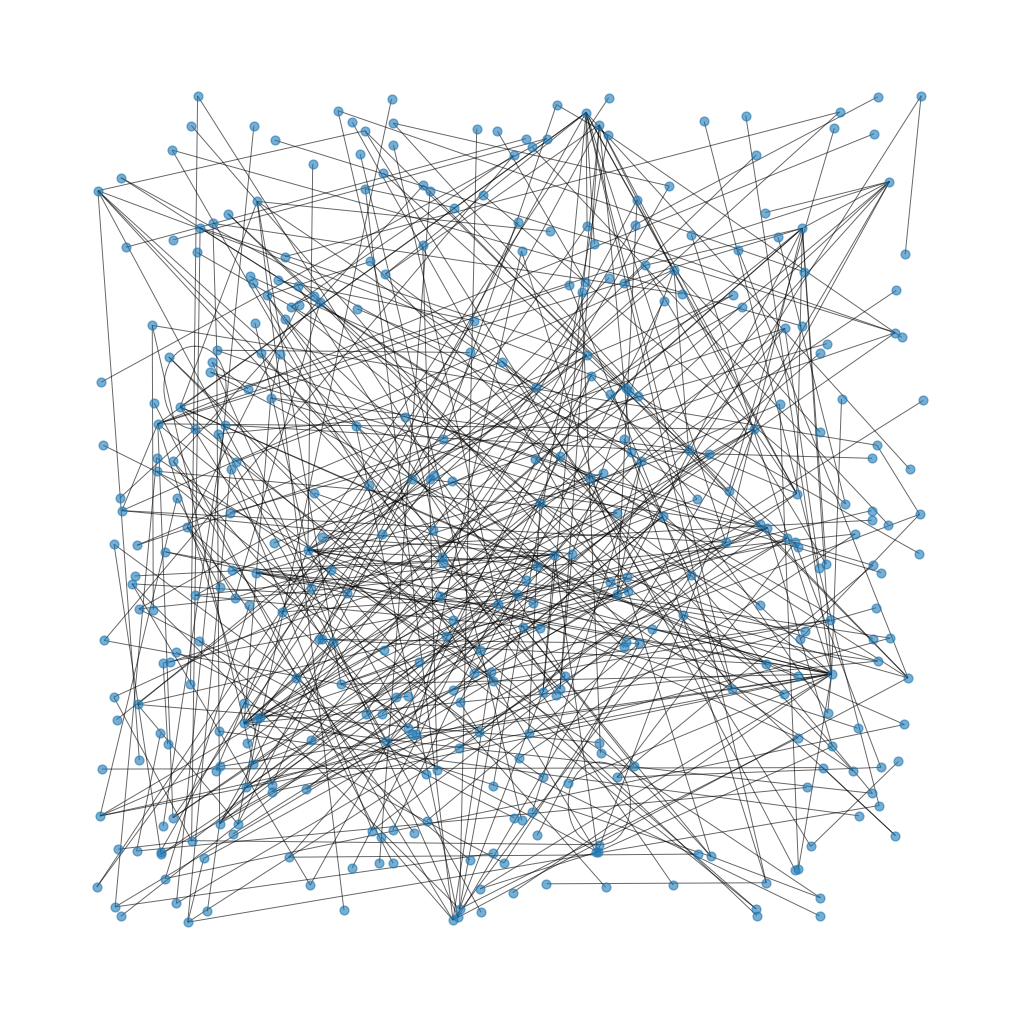

In [17]:
# create graph
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())

# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G_test, seed=23)
nx.draw(G_test, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

In [18]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# create graph
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())

# Convert node IDs to integers
node_mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, node_mapping)

# Split the edges into training and test sets, with 20% of edges used for testing
edges_train, edges_test = train_test_split(list(G.edges()), test_size=0.2, random_state=42)

# Create separate subgraphs for training and testing, using only the edges in the corresponding set
G_train = G.edge_subgraph(edges_train)
G_test = G.edge_subgraph(edges_test)


In [24]:
import csv
alpha = 0.1
max_iter = 100


# Compute the Jaccard distance and common neighbors for every pair of nodes
results = []
for u in G_train.nodes():
    for v in G_train.nodes():
        if u < v:
            jaccard_gen = nx.jaccard_coefficient(G_train, [(u, v)])
            jaccard = list(jaccard_gen)[0][2]
            cn = len(list(nx.common_neighbors(G_train, u, v)))
            #path_length = nx.shortest_path_length(G, u, v)
            pa_gen = nx.preferential_attachment(G_train, [(u,v)])
            pa = list(pa_gen)[0][2]
            is_edge = G_train.has_edge(u, v)
            #katz = nx.katz_similarity_numpy(G, alpha=alpha, beta=1, max_iter=max_iter)
            #Temporal features (assuming a temporal attribute 'time' is attached to each edge)
            #time_diff = abs(G[u][v]['time'])
            #freq_interactions = len(list(G.in_edges(u))) + len(list(G.out_edges(u))) + len(list(G.in_edges(v))) + len(list(G.out_edges(v)))
            #rate_change = (len(list(G.in_edges(u))) + len(list(G.out_edges(u)))) / (G.nodes[u]['time'] - G.nodes[v]['time'])
            results.append((u, v, jaccard, cn,pa,is_edge))

# Write the results to a CSV file
with open('features.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['node1', 'node2', 'JD', 'CN','PA','label'])
    writer.writerows(results)


In [25]:
import csv
alpha = 0.1
max_iter = 100


# Compute the Jaccard distance and common neighbors for every pair of nodes
results = []
for u in G_test.nodes():
    for v in G_test.nodes():
        if u < v:
            jaccard_gen = nx.jaccard_coefficient(G_test, [(u, v)])
            jaccard = list(jaccard_gen)[0][2]
            cn = len(list(nx.common_neighbors(G_test, u, v)))
            #path_length = nx.shortest_path_length(G, u, v)
            pa_gen = nx.preferential_attachment(G_test, [(u,v)])
            pa = list(pa_gen)[0][2]
            is_edge = G_test.has_edge(u, v)
            #katz = nx.katz_similarity_numpy(G, alpha=alpha, beta=1, max_iter=max_iter)
            #Temporal features (assuming a temporal attribute 'time' is attached to each edge)
            #time_diff = abs(G[u][v]['time'])
            #freq_interactions = len(list(G.in_edges(u))) + len(list(G.out_edges(u))) + len(list(G.in_edges(v))) + len(list(G.out_edges(v)))
            #rate_change = (len(list(G.in_edges(u))) + len(list(G.out_edges(u)))) / (G.nodes[u]['time'] - G.nodes[v]['time'])
            results.append((u, v, jaccard, cn,pa,is_edge))

# Write the results to a CSV file
with open('featurestest.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['node1', 'node2', 'JD', 'CN','PA','label'])
    writer.writerows(results)


In [26]:
import pandas as pd

# Load the feature matrix and target vector for the training graph
df_train = pd.read_csv('features.csv', index_col=0)

# Split the feature matrix and target vector
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values

# Load the feature matrix and target vector for the test graph
df_test = pd.read_csv('featurestest.csv', index_col=0)

# Split the feature matrix and target vector
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values


In [27]:
from sklearn.preprocessing import LabelBinarizer

# Convert the target vector to binary form
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)


In [28]:
# Oversample Class 1 using the SMOTE algorithm
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [29]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train_resampled, y_train_resampled)


In [30]:
import tensorflow as tf

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_resampled.shape[1]),
    tf.keras.layers.Dropout(0.2), # add dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2), # add another dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2), # add another dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2), # add another dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [33]:
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

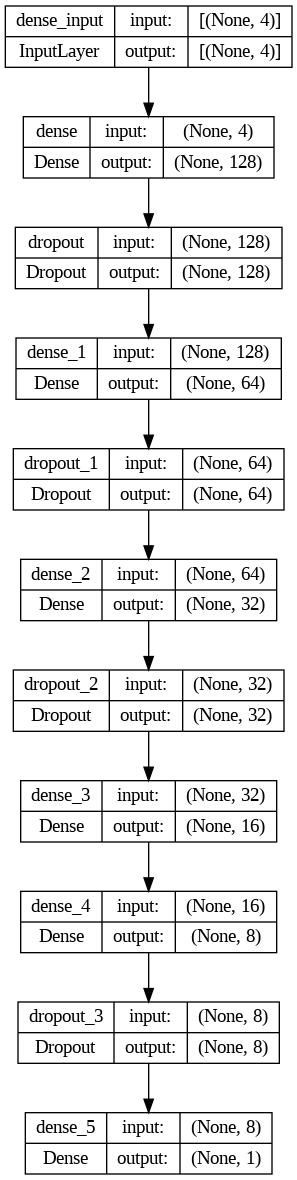

In [34]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Fit the model on the training data and save the training history
history = model.fit(X_resampled, y_resampled, epochs=25,batch_size=64, validation_data=(X_test, y_test))

# Print the training and validation accuracy for each epoch
print(history.history['accuracy'])
print(history.history['val_accuracy'])


Epoch 1/25
5214/5214 [==============================] - 21s 4ms/step - loss: 0.5251 - accuracy: 0.7643 - val_loss: 0.1893 - val_accuracy: 0.9794
Epoch 2/25
5214/5214 [==============================] - 20s 4ms/step - loss: 0.3871 - accuracy: 0.8632 - val_loss: 0.1880 - val_accuracy: 0.9838
Epoch 3/25
5214/5214 [==============================] - 19s 4ms/step - loss: 0.3751 - accuracy: 0.8697 - val_loss: 0.2029 - val_accuracy: 0.9830
Epoch 4/25
5214/5214 [==============================] - 26s 5ms/step - loss: 0.3698 - accuracy: 0.8714 - val_loss: 0.1807 - val_accuracy: 0.9837
Epoch 5/25
5214/5214 [==============================] - 19s 4ms/step - loss: 0.3638 - accuracy: 0.8737 - val_loss: 0.1753 - val_accuracy: 0.9859
Epoch 6/25
5214/5214 [==============================] - 19s 4ms/step - loss: 0.3609 - accuracy: 0.8744 - val_loss: 0.1941 - val_accuracy: 0.9851
Epoch 7/25
5214/5214 [==============================] - 19s 4ms/step - loss: 0.3570 - accuracy: 0.8757 - val_loss: 0.1934 - val_ac

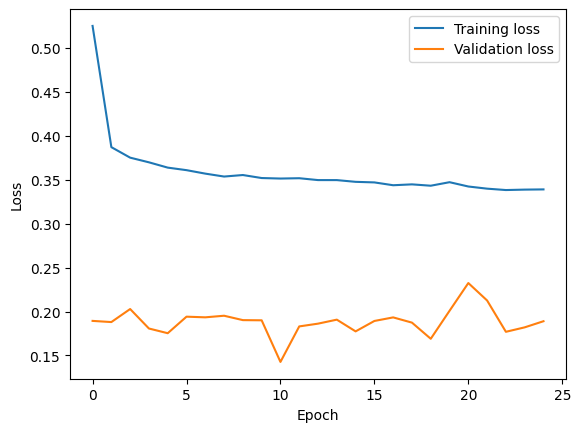

In [36]:
# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

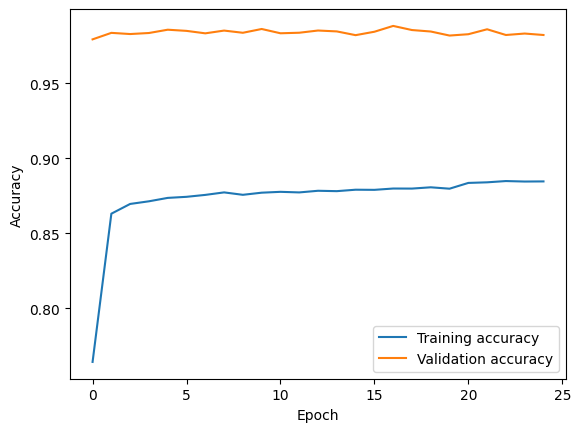

In [37]:
# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
# Predict the edges using the trained model
y_pred = model.predict(X_test)

# Convert the predicted probabilities to binary form using a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)


2263/2263 [==============================] - 4s 2ms/step


In [39]:
from sklearn.metrics import classification_report

# Get the predicted labels for the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print classification report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))


2263/2263 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99     71971
     Class 1       0.07      0.16      0.09       419

    accuracy                           0.98     72390
   macro avg       0.53      0.57      0.54     72390
weighted avg       0.99      0.98      0.99     72390



2263/2263 [==============================] - 3s 1ms/step


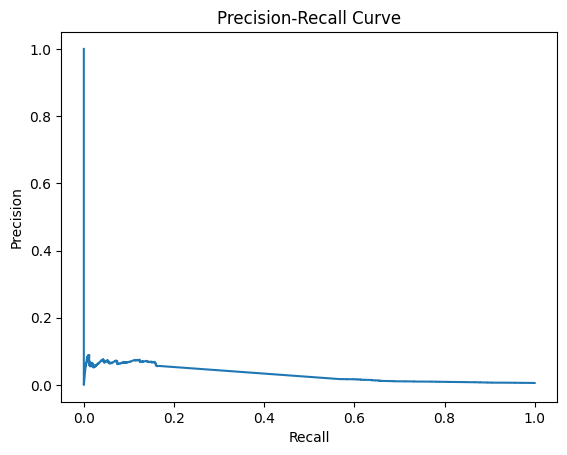

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Predict the probabilities for the test set
y_pred_prob = model.predict(X_test)

# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


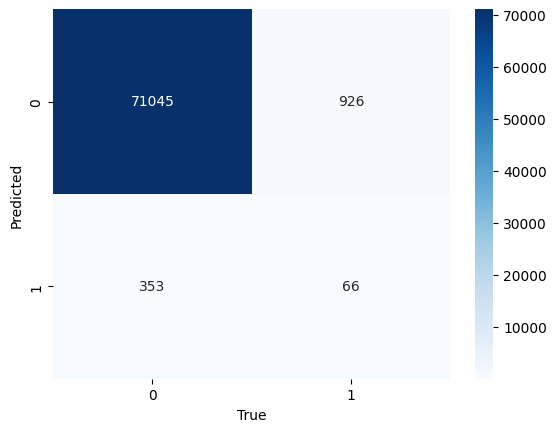

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()


In [42]:
from sklearn.metrics import classification_report

# Get the predicted labels for the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print classification report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))


2263/2263 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99     71971
     Class 1       0.07      0.16      0.09       419

    accuracy                           0.98     72390
   macro avg       0.53      0.57      0.54     72390
weighted avg       0.99      0.98      0.99     72390



In [43]:
def compute_hits(y_true, y_pred, k):
    hits = 0
    for i in range(len(y_true)):
        if y_true[i] in y_pred[i, :k]:
            hits += 1
    return hits / len(y_true)

hits_10 = compute_hits(y_test, y_pred, 10)
hits_100 = compute_hits(y_test, y_pred, 100)
hits_500 = compute_hits(y_test, y_pred, 500)


In [44]:
def compute_mrr(y_true, y_pred):
    mrr = 0
    for i in range(len(y_true)):
        rank = np.where(y_pred[i] == y_true[i])[0]
        if len(rank) > 0:
            mrr += 1 / (rank[0] + 1)
    return mrr / len(y_true)

mrr = compute_mrr(y_test, y_pred)


In [45]:
def compute_amri(y_true, y_pred):
    amri = 0
    for i in range(len(y_true)):
        rank = np.where(y_pred[i] == y_true[i])[0]
        if len(rank) > 0:
            amri += np.exp(-rank[0])
    return amri / len(y_true)

amri = compute_amri(y_test, y_pred)


In [46]:
print('Hits @10:', hits_10)
print('Hits @100:', hits_100)
print('Hits @500:', hits_500)
print('MRR:', mrr)
print('AMRI:', amri)


Hits @10: 0.9823318137864346
Hits @100: 0.9823318137864346
Hits @500: 0.9823318137864346
MRR: 0.9823318137864346
AMRI: 0.9823318137864346


In [47]:
# Predict the probability of link formation for all test edges
preds = model.predict(X_test).flatten()

# Get the indices that would sort the predictions array in descending order
sorted_idx = np.argsort(preds)[::-1]

# Print the ranks of the top 10 predictions
for i in range(10):
    rank = i + 1
    idx = sorted_idx[i]
    print(f"Rank {rank}: Prediction = {preds[idx]}")


2263/2263 [==============================] - 3s 1ms/step
Rank 1: Prediction = 0.99889075756073
Rank 2: Prediction = 0.9981265664100647
Rank 3: Prediction = 0.998096227645874
Rank 4: Prediction = 0.9964129328727722
Rank 5: Prediction = 0.9944479465484619
Rank 6: Prediction = 0.9944479465484619
Rank 7: Prediction = 0.9822244048118591
Rank 8: Prediction = 0.9818459749221802
Rank 9: Prediction = 0.9815837740898132
Rank 10: Prediction = 0.9804812669754028


In [48]:
# Get a list of all node IDs in the test graph
test_nodes = list(G_test.nodes())

id2node_test = {i: node for i, node in enumerate(G_test.nodes())}
